# Chargement des packages

In [3]:

# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report

# Base de données Diabetes

La base de données "Diabetes" est disponible sur [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database). Cette base de données contient des informations sur des patientes féminines âgées d'au moins 21 ans et provenant de populations amérindiennes Pima, qui ont été examinées pour déterminer s'ils avaient un diabète de type 2. Les caractéristiques incluent des mesures telles que la taille, le poids, l'âge, le nombre de grossesses, la pression artérielle, etc.

## Contenu de la base de données

La base de données contient les colonnes suivantes :

- `Pregnancies` : nombre de grossesses
- `Glucose` : concentration de glucose dans le plasma sanguin à jeun
- `BloodPressure` : pression artérielle diastolique (mm Hg)
- `SkinThickness` : épaisseur du pli cutané tricipital (mm)
- `Insulin` : taux d'insuline sérique de 2 heures (mu U/ml)
- `BMI` : indice de masse corporelle (kg/m²)
- `DiabetesPedigreeFunction` : fonction pedigree du diabète
- `Age` : âge (années)
- `Outcome` : variable cible indiquant si le patient est diabétique (0 = non diabétique, 1 = diabétique)

## Objectif de l'analyse

L'objectif de cette analyse est de construire un modèle de classification pour prédire si une patiente a un diabète de type 2 en fonction de ses caractéristiques cliniques. Cette base de données sera divisée en ensembles d'apprentissage et de test pour entraîner et évaluer les performances du modèle.


# Importation et nettoyage des données

In [4]:
# Chargement des données
diabete=pd.read_csv("diabetes.csv")

In [5]:

diabete.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [6]:
# Affichage des informations générales sur le DataFrame
diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Description des données

In [7]:
# Affichage des statistiques descriptives du DataFrame
diabete.describe()


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [8]:
# Affichage du nombre de valeurs uniques pour chaque variable
print(diabete.nunique())


Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


In [9]:
# Affichage du nombre de valeurs manquantes pour chaque variable
print(diabete.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


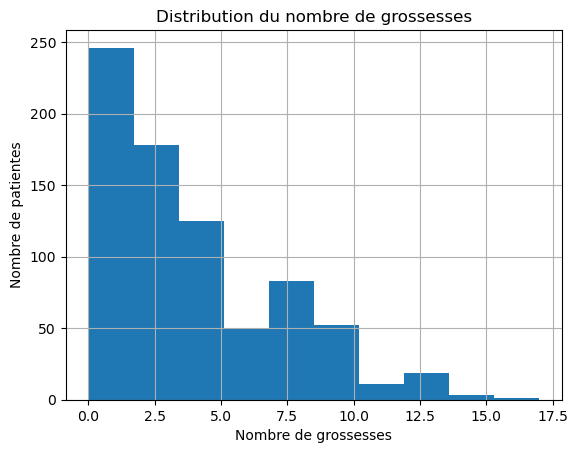

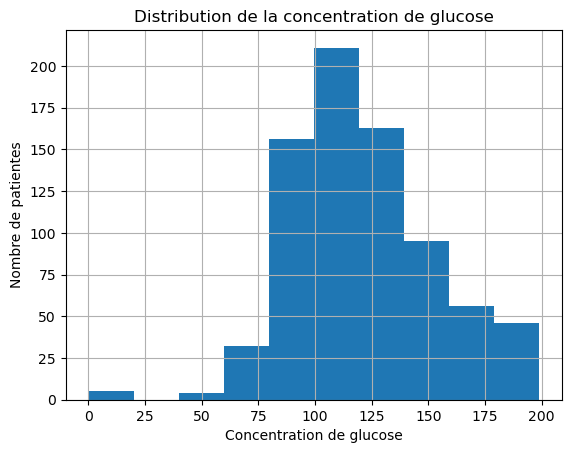

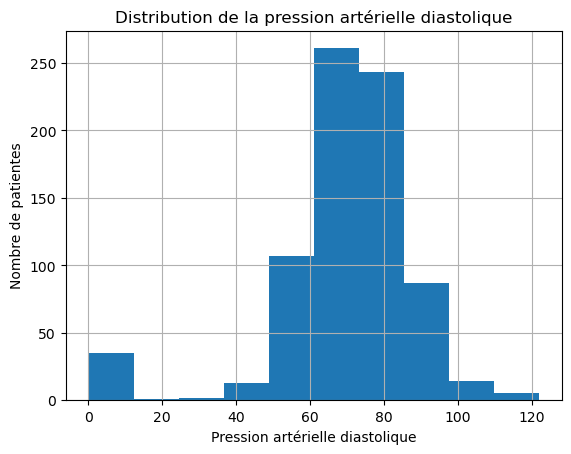

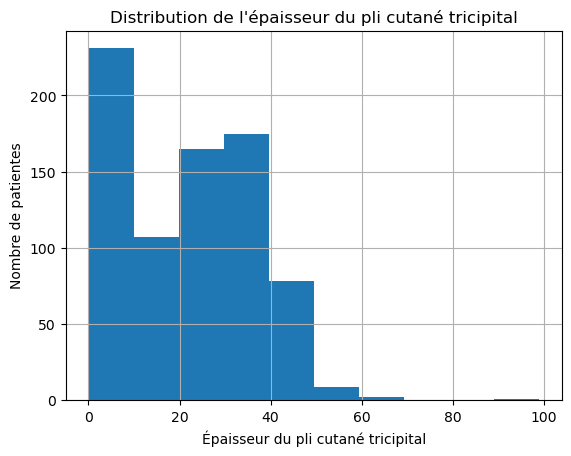

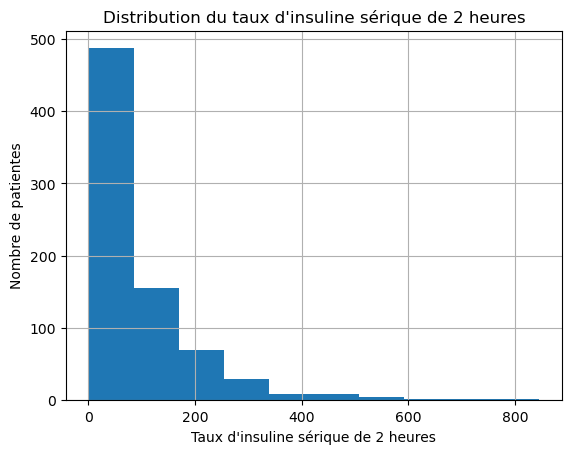

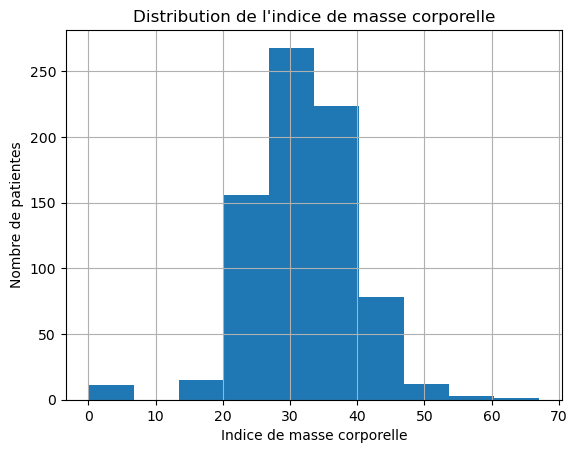

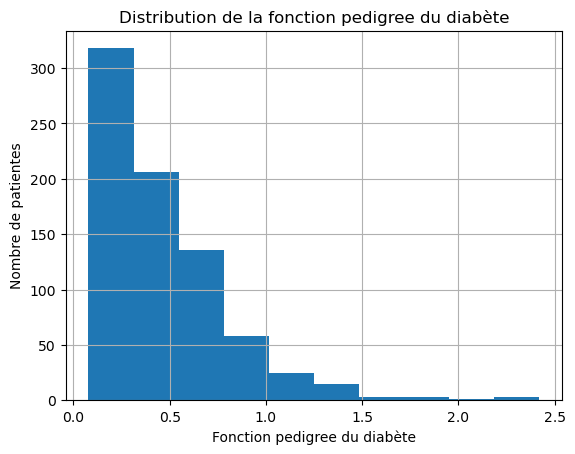

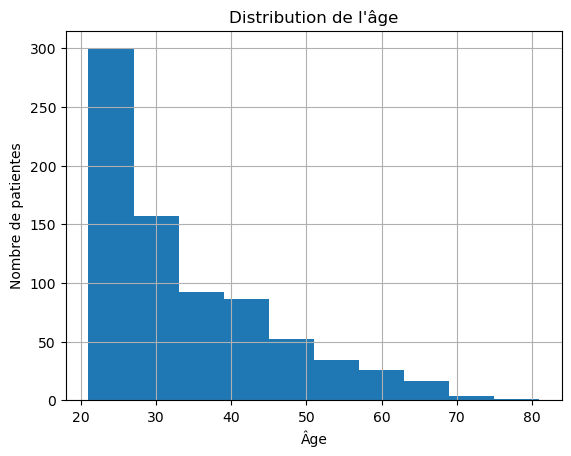

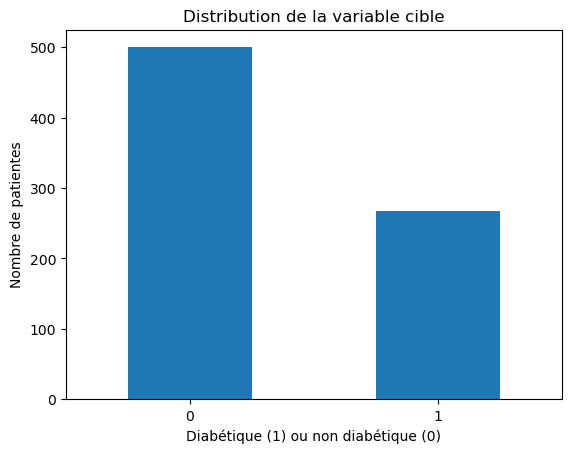

In [10]:

# Histogramme de la variable 'Pregnancies'
diabete['Pregnancies'].hist()
plt.title('Distribution du nombre de grossesses')
plt.xlabel('Nombre de grossesses')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'Glucose'
diabete['Glucose'].hist()
plt.title('Distribution de la concentration de glucose')
plt.xlabel('Concentration de glucose')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'BloodPressure'
diabete['BloodPressure'].hist()
plt.title('Distribution de la pression artérielle diastolique')
plt.xlabel('Pression artérielle diastolique')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'SkinThickness'
diabete['SkinThickness'].hist()
plt.title('Distribution de l\'épaisseur du pli cutané tricipital')
plt.xlabel('Épaisseur du pli cutané tricipital')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'Insulin'
diabete['Insulin'].hist()
plt.title('Distribution du taux d\'insuline sérique de 2 heures')
plt.xlabel('Taux d\'insuline sérique de 2 heures')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'BMI'
diabete['BMI'].hist()
plt.title('Distribution de l\'indice de masse corporelle')
plt.xlabel('Indice de masse corporelle')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'DiabetesPedigreeFunction'
diabete['DiabetesPedigreeFunction'].hist()
plt.title('Distribution de la fonction pedigree du diabète')
plt.xlabel('Fonction pedigree du diabète')
plt.ylabel('Nombre de patientes')
plt.show()

# Histogramme de la variable 'Age'
diabete['Age'].hist()
plt.title('Distribution de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Nombre de patientes')
plt.show()

# Diagramme en barres de la variable 'Outcome'
diabete['Outcome'].value_counts().plot(kind='bar')
plt.title('Distribution de la variable cible')
plt.xlabel('Diabétique (1) ou non diabétique (0)')
plt.ylabel('Nombre de patientes')
plt.xticks(rotation=0)
plt.show()

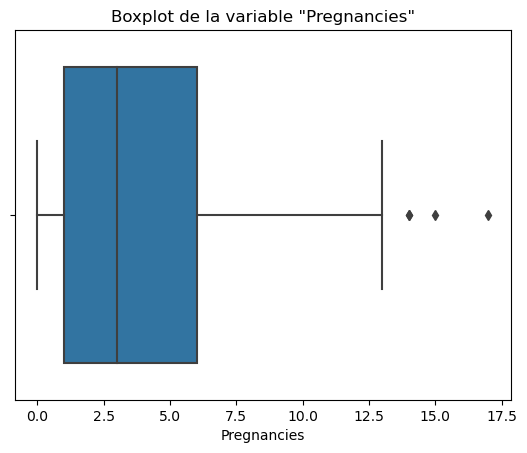

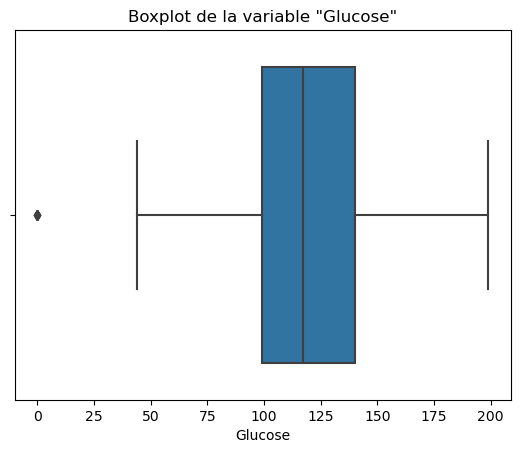

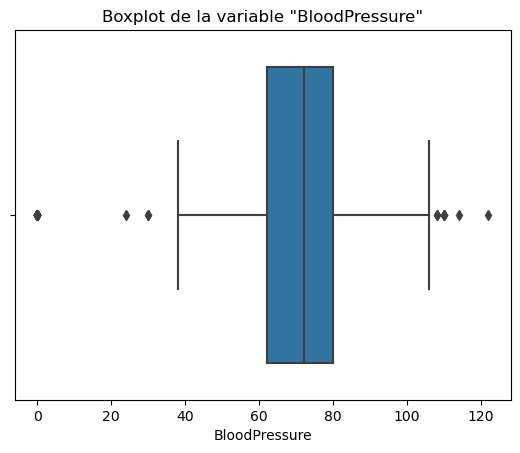

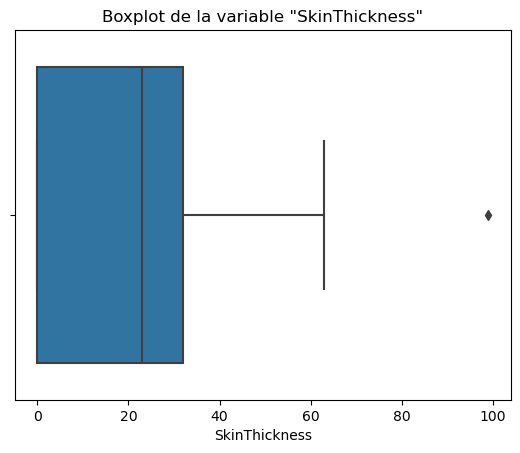

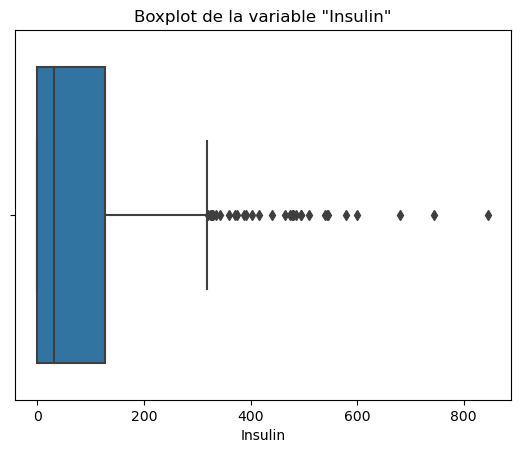

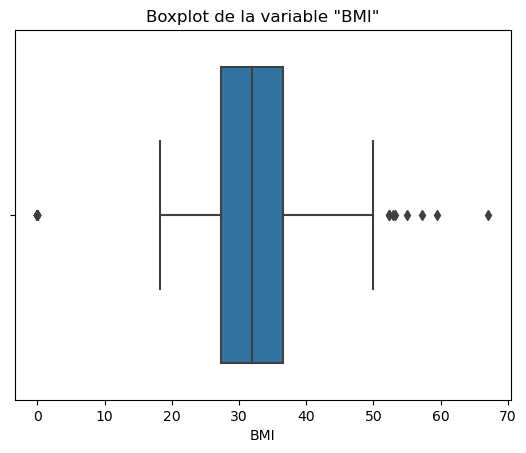

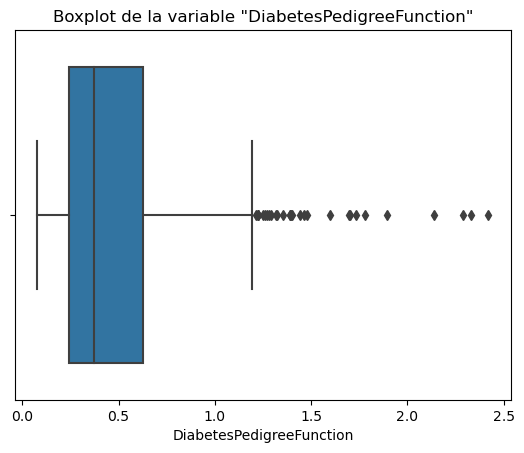

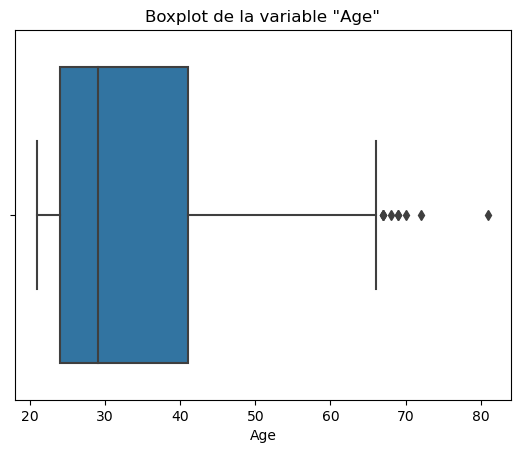

In [11]:
# Génération des boxplots pour chaque variable numérique sur des graphiques séparés
for col in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    sns.boxplot(x=diabete[col])
    plt.title(f'Boxplot de la variable "{col}"')
    plt.show()

## Analyse des liaisons entre les variables

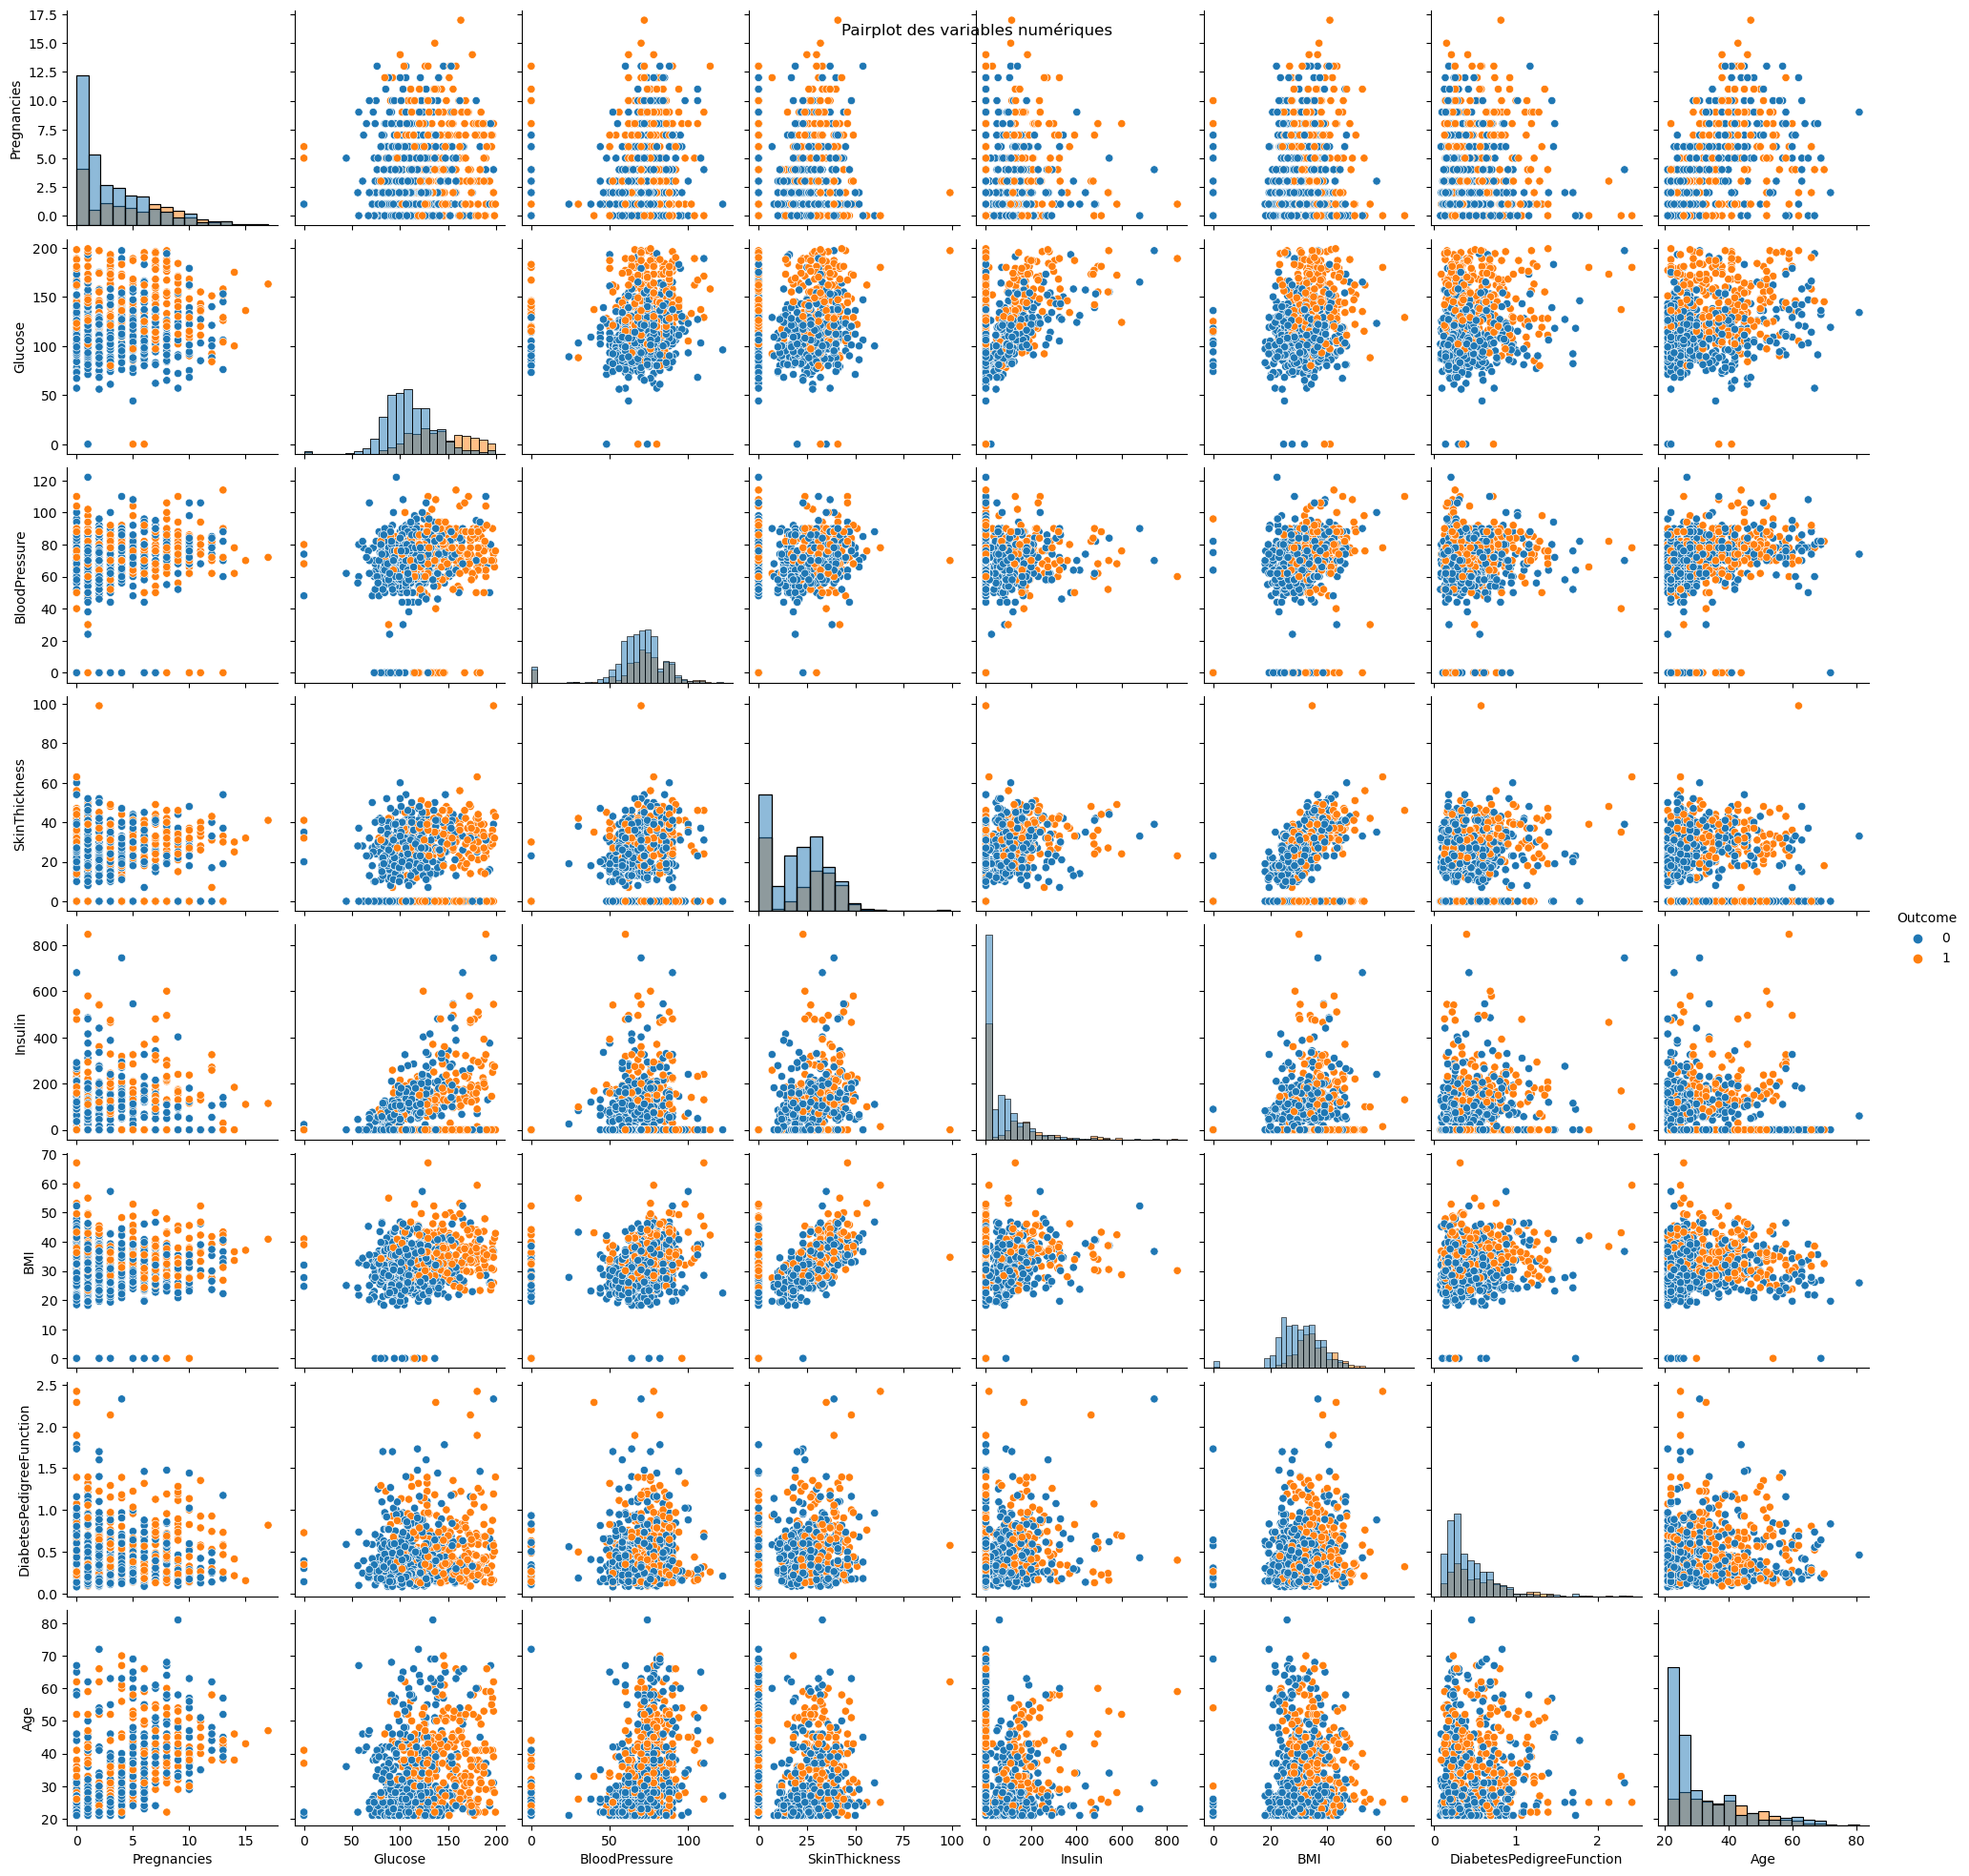

In [12]:
# Génération du pairplot
sns.pairplot(data=diabete, hue='Outcome', diag_kind='hist')
plt.suptitle('Pairplot des variables numériques')
plt.show()

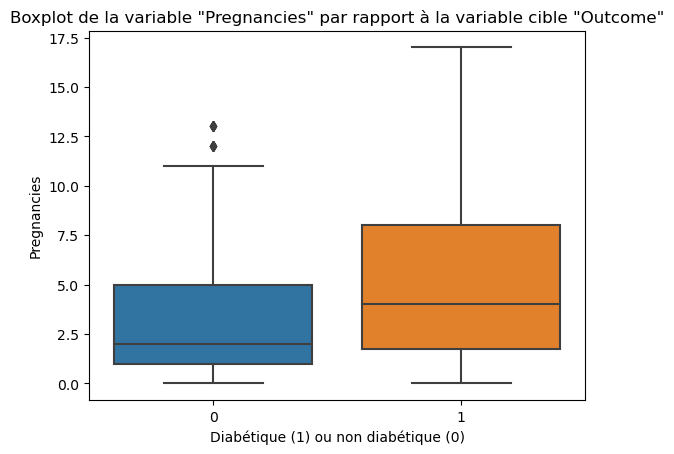

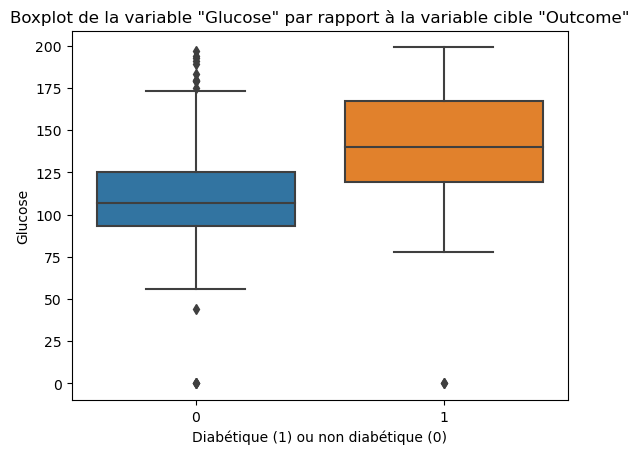

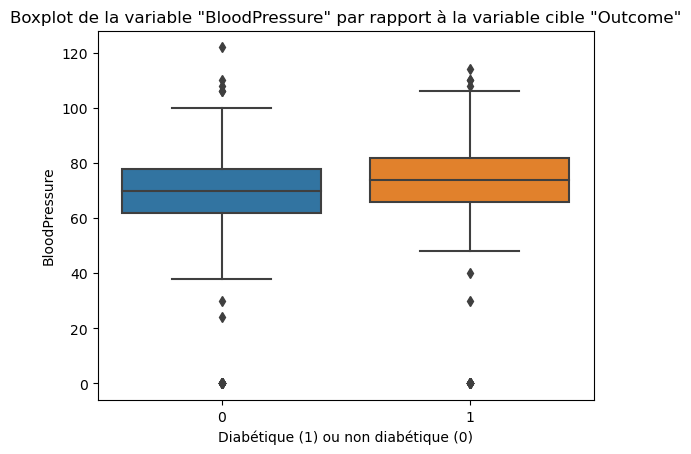

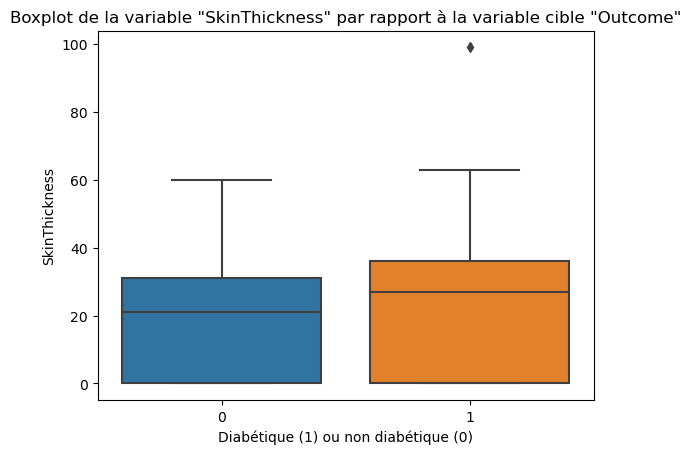

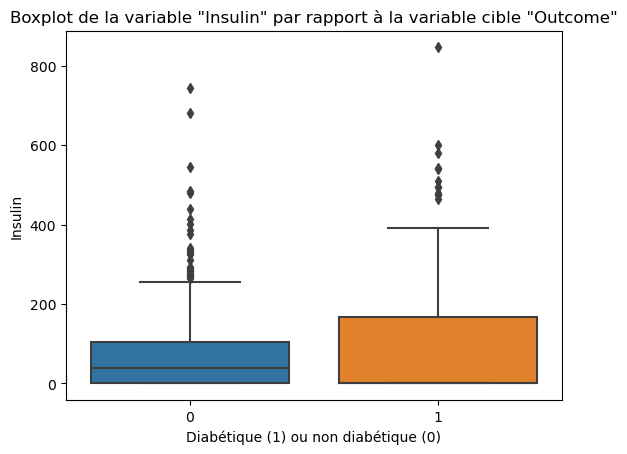

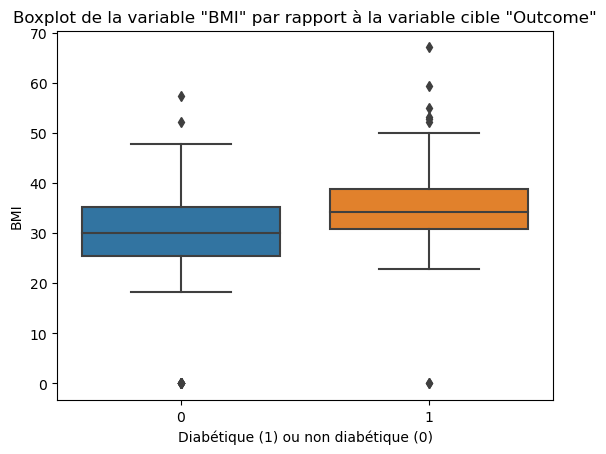

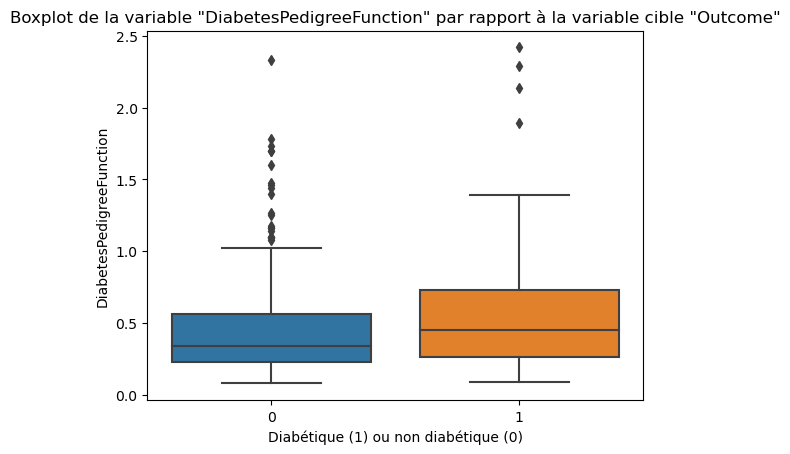

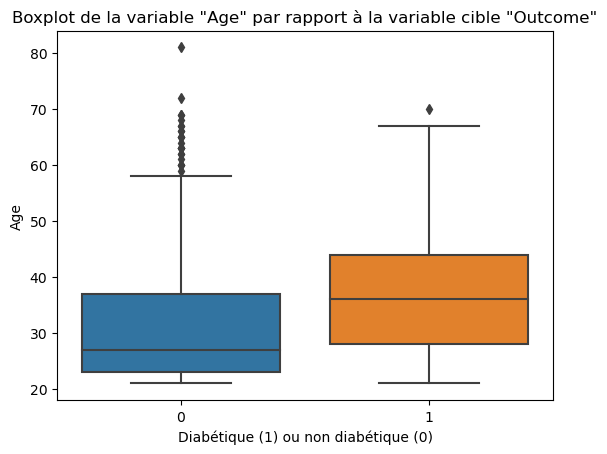

In [13]:
# Génération des boxplots bivariés pour chaque variable numérique sur des graphiques séparés
for col in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    sns.boxplot(data=diabete, x='Outcome', y=col)
    plt.title(f'Boxplot de la variable "{col}" par rapport à la variable cible "Outcome"')
    plt.xlabel('Diabétique (1) ou non diabétique (0)')
    plt.ylabel(col)
    plt.show()

In [14]:
# Calcul des statistiques de test de Kruskal-Wallis et des p-valeurs pour chaque variable numérique
num_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

from scipy.stats import kruskal
p_values = []
for col in num_vars:
    h, pval = kruskal(diabete[col][diabete['Outcome']==0], diabete[col][diabete['Outcome']==1])
    p_values.append(pval)

    # Création d'une liste pour stocker les valeurs de significativité
is_significant = []

# Vérification de la significativité pour chaque p-valeur et stockage dans la liste is_significant
for pval in p_values:
    if pval < 0.05:
        is_significant.append('Oui')
    else:
        is_significant.append('Non')

# Affichage des résultats dans un tableau
result_table = pd.DataFrame({'Variable': num_vars, 'P-value': p_values, 'Significative': is_significant})
result_table.set_index('Variable', inplace=True)
print(result_table)



                               P-value Significative
Variable                                            
Pregnancies               3.741498e-08           Oui
Glucose                   1.198015e-39           Oui
BloodPressure             7.553110e-05           Oui
SkinThickness             1.295554e-02           Oui
Insulin                   6.563377e-02           Non
BMI                       9.716371e-18           Oui
DiabetesPedigreeFunction  1.195553e-06           Oui
Age                       1.140509e-17           Oui


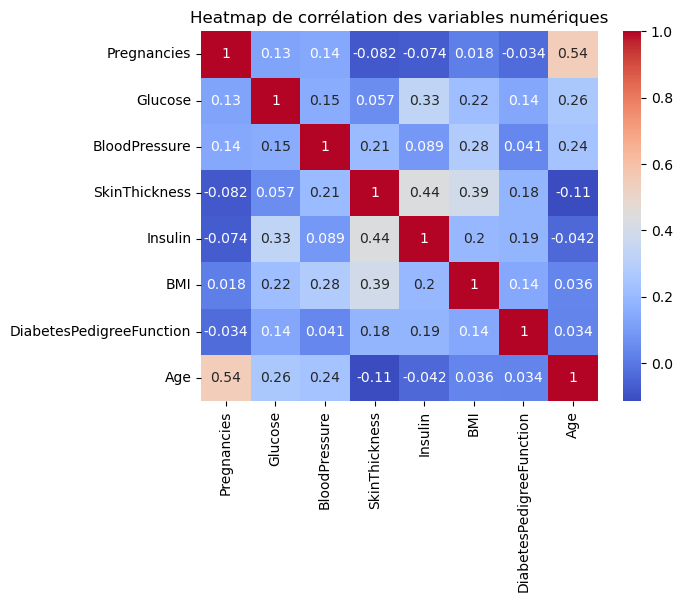

In [15]:
# Sélection des variables numériques
num_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df_num = diabete[num_vars]

# Génération de la heatmap de corrélation
sns.heatmap(df_num.corr(), cmap='coolwarm', annot=True)
plt.title('Heatmap de corrélation des variables numériques')
plt.show()

# XGBoost

## Préparation des données

In [16]:
# Préparation des données
X = diabete.drop('Outcome', axis=1)
y = diabete['Outcome']

# Division des données en ensemble d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
!pip install xgboost
from xgboost import XGBClassifier


## XGBoost avec optimisation des paramètresr avec GridSearchCV

In [20]:
from sklearn.model_selection import  GridSearchCV
import time

In [22]:
# Définition des paramètres à optimiser
param_grid = {
    # max_depth est la profondeur maximale de chaque arbre. Une valeur plus élevée rendra le modèle plus complexe et pourrait entraîner un surapprentissage.
    'max_depth': [3, 4, 5,7,8],
    
    # learning_rate (ou taux d'apprentissage) est le pas d'ajustement effectué à chaque étape de l'optimisation. Une valeur plus faible rendra l'apprentissage plus lent.
    'learning_rate': [0.01, 0.1, 0.2],
    
    # n_estimators est le nombre d'arbres à construire.
    'n_estimators': [100, 200, 300,500,1000],
    
    
}

# Création de l'objet GridSearch

model = XGBClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2)


In [23]:
# Enregistrement du temps actuel
start_time = time.time()

# Entraînement du modèle avec GridSearch
grid_search.fit(X_train, y_train)

# Calcul du temps d'exécution
execution_time = time.time() - start_time



Fitting 5 folds for each of 75 candidates, totalling 375 fits


In [24]:
# Affichage des meilleurs paramètres
print("Best parameters found: ", grid_search.best_params_)

# Affichage du temps d'exécution
print("Temps d'exécution: %.2f secondes" % execution_time)


Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Temps d'exécution: 7.88 secondes


In [25]:

# Utilisation du meilleur modèle trouvé pour la prédiction
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [26]:
# Classification Report
print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


Train Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       401
           1       0.83      0.76      0.79       213

    accuracy                           0.86       614
   macro avg       0.85      0.84      0.85       614
weighted avg       0.86      0.86      0.86       614


Test Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



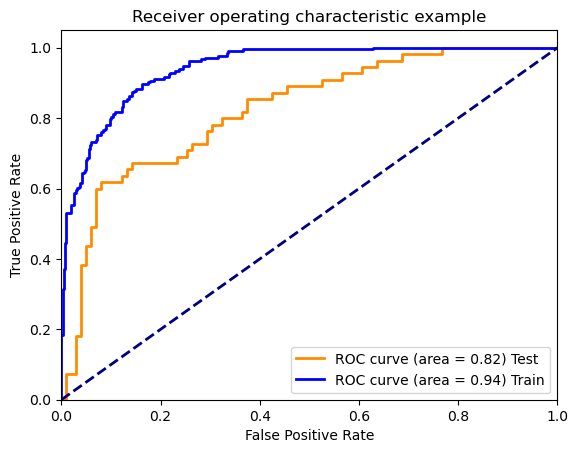

[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=300; total time=   0.2s
[CV] END .learning_rate=0.01, max_depth=7, n_estimators=1000; total time=   0.6s
[CV] END ..learning_rate=0.0

In [27]:
from sklearn.metrics import roc_curve,auc
# Courbe ROC pour le jeu de données test
# Courbe ROC
y_train_pred_prob = best_model.predict_proba(X_train)[:,1]
y_test_pred_prob = best_model.predict_proba(X_test)[:,1]

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Courbe ROC pour le jeu de données d'entraînement
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# Affichage des courbes ROC
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f) Test' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (area = %0.2f) Train' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



In [ ]:
# Importance des variables
importance_scores = best_model.feature_importances_

# Création du DataFrame d'importance des variables
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importance_scores
}).sort_values(by='importance', ascending=False)

# Affichage du DataFrame d'importance des variables
print(importance_df)



# Interprétabilité des modèles de Machine learning

Pour plus de détails sur le sujet vous pouvez lire: [Interpretable Machine Learning par Christoph Molnar](https://christophm.github.io/interpretable-ml-book/)


## Interprétabilité Locale

L'interprétation locale des modèles consiste en un ensemble de techniques destinées à répondre à des questions telles que :

-Pourquoi le modèle a-t-il fait cette prédiction spécifique ?

-Quel a été l'impact de cette valeur de caractéristique spécifique sur la prédiction ?

### LIME

LIME =Local Interpretable Model-Agnostic Explanations

LIME est une technique qui permet de créer un modèle simple autour de la prédiction que nous voulons expliquer et utilise ce modèle simple pour donner une explication. LIME peut être utilisé avec n'importe quel modèle de machine learning, pas seulement avec des arbres de décision ou des forêts aléatoires.

**L'idée de base de LIME est assez simple. Pour une prédiction donnée, LIME perturbe les entrées de la prédiction et essaie de comprendre comment ces perturbations affectent la sortie du modèle**. Les attributs qui affectent le plus la sortie lorsqu'ils sont perturbés sont considérés comme ayant une importance élevée pour cette prédiction spécifique.


In [31]:
#pip install lime
import lime
from lime import lime_tabular

# Création de l'explainer
explainer = lime_tabular.LimeTabularExplainer(X_train.values, 
                                              feature_names=X_train.columns.values.tolist(), 
                                              class_names=['0','1'], 
                                              verbose=True, 
                                              mode='classification')

# Choisissez un exemple spécifique à expliquer
i = 3
exp = explainer.explain_instance(X_test.values[i], best_model.predict_proba, num_features=5)

# Afficher l'explication
exp.show_in_notebook(show_table=True)


Intercept 0.38026937762765156
Prediction_local [0.2489335]
Right: 0.1642855


### Shapley Values

La valeur de Shapley, dans le contexte de l'interprétation de modèles d'apprentissage automatique, permet d'évaluer l'impact de chaque caractéristique sur une prédiction donnée. **Elle fait cela en calculant la contribution moyenne de chaque caractéristique à la prédiction sur toutes les combinaisons possibles de caractéristiques**.

In [32]:
#pip install shap
import shap
# Initialisation du Javascript
shap.initjs()

# Création de l'explainer
explainer = shap.TreeExplainer(grid_search.best_estimator_)

# Calcul des valeurs SHAP pour les instances de test
shap_values = explainer.shap_values(X_test)

# Choisissez un exemple spécifique à expliquer
i = 3  # vous pouvez choisir l'indice de l'exemple que vous souhaitez expliquer
shap.force_plot(explainer.expected_value, shap_values[i,:], X_test.iloc[i,:])


/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


## Interprétabilité globale

### Importance des caractéristiques (Features importance)

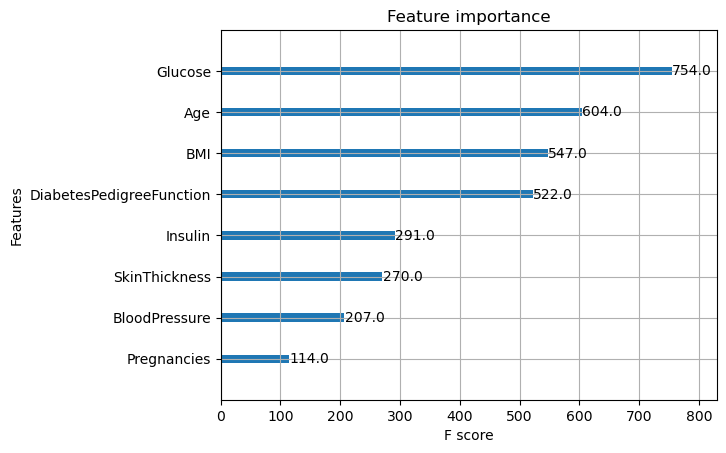

In [33]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Affichage de l'importance des caractéristiques
plot_importance(grid_search.best_estimator_)
plt.show()


### SHAP (SHapley Additive explanations)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


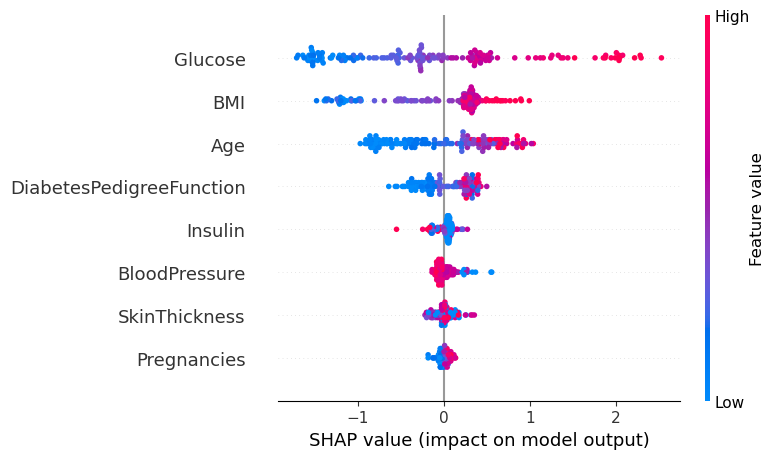

In [34]:
# Graphique SHAP résumé pour l'interprétabilité globale
shap.summary_plot(shap_values, X_test)

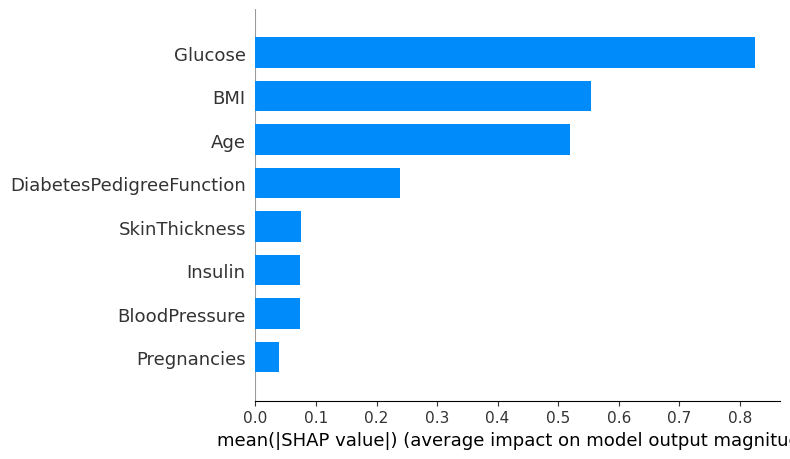

In [35]:

# Création de l'objet explainer
explainer = shap.TreeExplainer(grid_search.best_estimator_)

# Calcul des valeurs SHAP
shap_values = explainer.shap_values(X_train)

# Tracer le graphique SHAP de synthèse
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Afficher le graphique
plt.show()

### Permutation importance

Cette technique évalue l'importance d'une caractéristique en permutant les valeurs de la caractéristique et en observant l'impact sur le score du modèle.

In [36]:
#pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(best_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

### Partial Dependence Plots (PDPs)

Le graphique de dépendance partielle (abrégé PDP ou PD plot) montre l'effet marginal qu'une ou deux caractéristiques ont sur le résultat prédit d'un modèle d'apprentissage automatique (J. H. Friedman 200130).


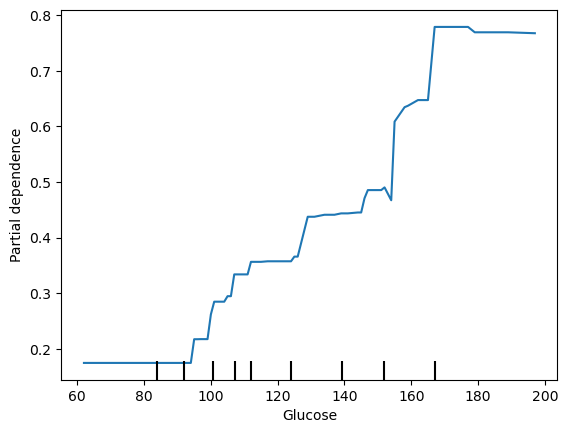

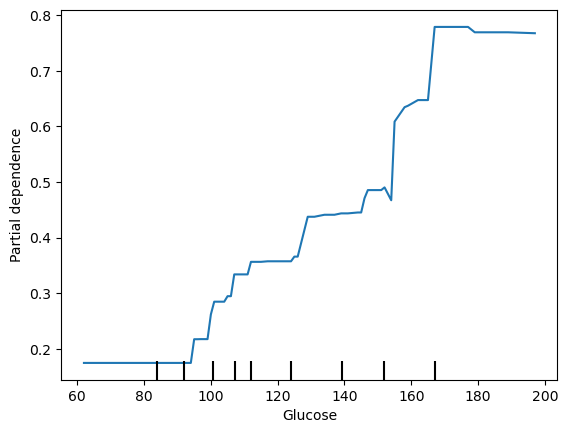

In [37]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

# Calculer la dépendance partielle
pdp_goals, axes = partial_dependence(best_model, X_test, features=['Glucose'])

# Créer le display
display = PartialDependenceDisplay.from_estimator(
    best_model,
    X_test,
    features=['Glucose'],
)

# Afficher le graphique
display.plot()


### Individual Conditional Expectation (ICE) plot

<Axes: >

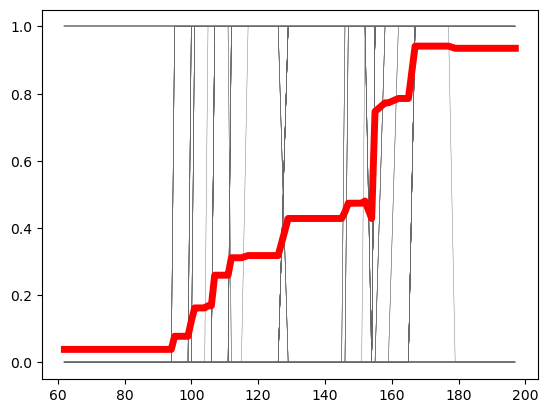

In [38]:
#
#!pip install pycebox
from pycebox.ice import ice, ice_plot

ice_df = ice(data=X_test, column='Glucose', predict=best_model.predict)
ice_plot(ice_df, c='dimgray', linewidth=0.3, plot_pdp=True, pdp_kwargs={'c': 'red', 'linewidth': 5})
